In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
print (x_train.shape)

(50000, 32, 32, 3)


In [8]:
print (y_train.shape)

(50000, 1)


In [9]:
print (x_test.shape)

(10000, 32, 32, 3)


In [10]:
print (y_test.shape)

(10000, 1)


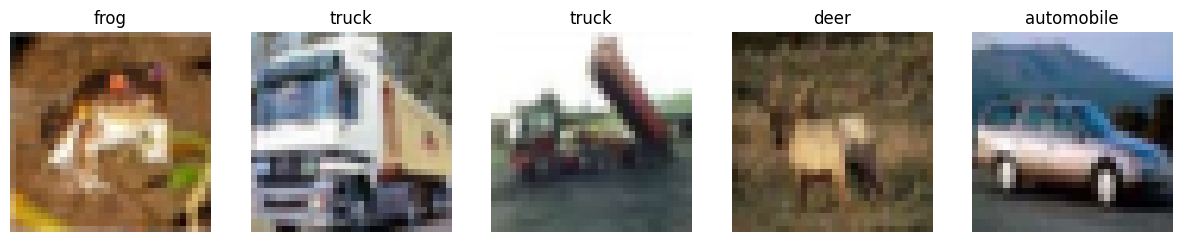

In [11]:
#visualize sample of the dataset from the train dataset
fig, axs = plt.subplots(1,5, figsize=(15,3))
for i in range (5):
    axs[i].imshow(x_train[i])
    axs[i].set_title(class_names[y_train[i][0]]) #title from each group in the dataset
    axs[i].axis('off')

plt.show()

In [12]:
#normalise the dataset for the image pixel value to be between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
#image transformation for data augumentation
# data augumentation will generate new images by applying data transformation to the images in the training set

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15, # randomly rotate images up to 15 degree
    width_shift_range=0.1, #randomly shift images horizontally up to 10% of the width
    height_shift_range = 0.15, #randomly shift images vertically up to 15% of the height
    horizontal_flip=True, #randomly flip images horizontally
    vertical_flip = False, #don't flip images vertically
    shear_range=0.10, #crop a part of the image up to 10%
    zoom_range=0.10 #zoom image up to 10%
)


In [14]:
train_datagen.fit(x_train)

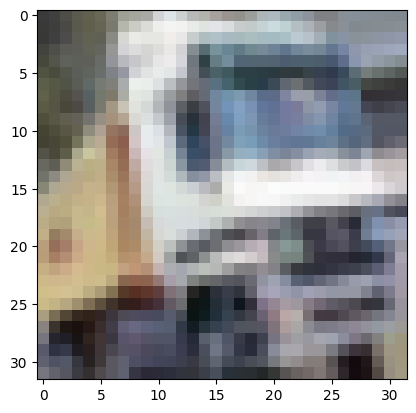

In [15]:
plt.imshow(train_datagen.random_transform(x_train[1]))

In [16]:
#import libraries needed to build CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [17]:
model = Sequential()


In [18]:
#model.add(input_shape=(32,32,3)),Conv2D(filters=32,kernel_size=(3,3)),activation('relu')
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [20]:
#model.add(input_shape=(32,32,3)),Conv2D(filters=32,kernel_size=(3,3)),activation('relu')
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [22]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(64, activation = 'relu'))

In [26]:
model.add(Dropout(0.5))

In [27]:
model.add(Dense(10, activation ='softmax'))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#Compile and train with the built model
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history=model.fit(train_datagen.flow(x_train,keras.utils.to_categorical(y_train),batch_size=32),
                                     epochs=20, validation_data=(x_test,keras.utils.to_categorical(y_test)))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.2072 - loss: 2.0931 - val_accuracy: 0.4392 - val_loss: 1.5358
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.3907 - loss: 1.6632 - val_accuracy: 0.5077 - val_loss: 1.3458
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.4476 - loss: 1.5120 - val_accuracy: 0.5616 - val_loss: 1.2457
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4924 - loss: 1.4211 - val_accuracy: 0.5622 - val_loss: 1.2379
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5180 - loss: 1.3493 - val_accuracy: 0.6230 - val_loss: 1.0813
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5421 - loss: 1.2951 - val_accuracy: 0.6241 - val_loss: 1.0628
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.5603 - loss: 1.2621 - val_accuracy: 0.6346 - val_loss: 1.0321
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5712 -

In [34]:
history_df = pd.DataFrame(history.history)
history_df["loss"]
history_df["val_loss"]

0     1.535790
1     1.345788
2     1.245743
3     1.237856
4     1.081281
5     1.062845
6     1.032063
7     1.058748
8     0.979363
9     1.040478
10    0.958512
11    0.985560
12    0.902769
13    0.934112
14    0.896223
15    0.923581
16    0.921194
17    0.854645
18    0.906710
19    0.907824
Name: val_loss, dtype: float64

In [35]:
history_df["accuracy"]

0     0.27480
1     0.40866
2     0.46050
3     0.49780
4     0.52574
5     0.54808
6     0.56292
7     0.57742
8     0.58816
9     0.59708
10    0.60558
11    0.61054
12    0.61652
13    0.61920
14    0.62934
15    0.63118
16    0.63694
17    0.63636
18    0.64354
19    0.64840
Name: accuracy, dtype: float64

In [36]:
history_df["val_accuracy"]

0     0.4392
1     0.5077
2     0.5616
3     0.5622
4     0.6230
5     0.6241
6     0.6346
7     0.6411
8     0.6607
9     0.6535
10    0.6665
11    0.6622
12    0.6893
13    0.6779
14    0.6931
15    0.6927
16    0.6868
17    0.7093
18    0.6977
19    0.6955
Name: val_accuracy, dtype: float64

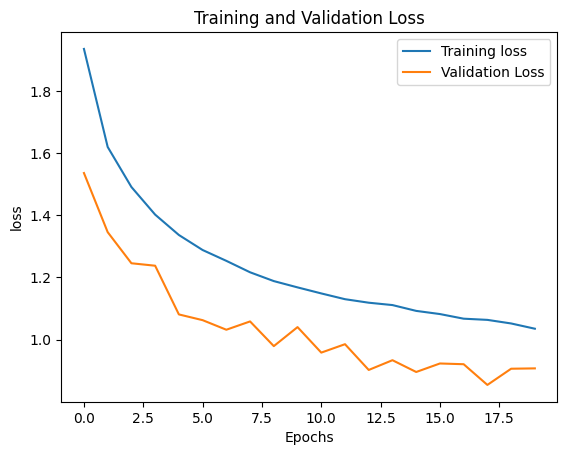

In [37]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

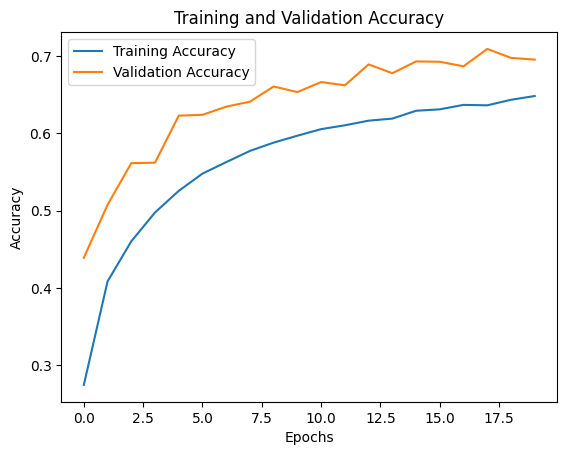

In [38]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
y_pred = np.argmax(model.predict(x_test), axis =-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.76      0.91      0.83      1000
           2       0.80      0.40      0.53      1000
           3       0.57      0.45      0.50      1000
           4       0.55      0.78      0.64      1000
           5       0.72      0.49      0.58      1000
           6       0.73      0.81      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.83      0.77      0.80      1000
           9       0.69      0.84      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



<Figure size 2000x3000 with 0 Axes>

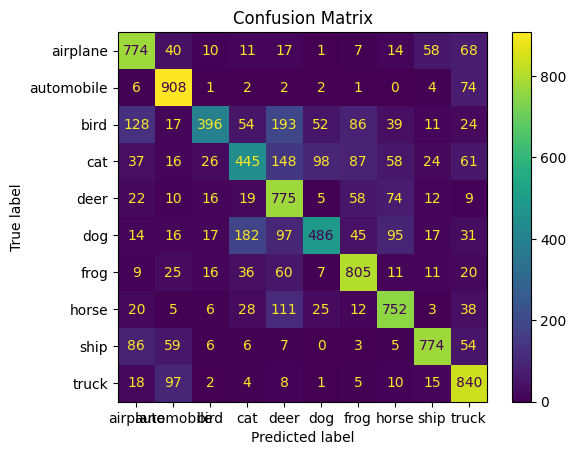

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10, 15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()
    